# Implementation using Scipy

### Example  1 - from Scipy  - multiple coupled solutions

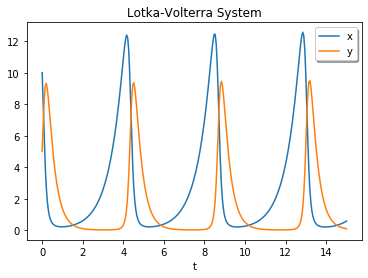

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)
t = np.linspace(0, 15, 300)
z = sol.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

### Example 2 - from epythonguru - 2nd order solution

[[ 0.00000000e+00  0.00000000e+00]
 [-4.40027338e-04 -1.97604647e-02]
 [-1.81156777e-03 -4.11248784e-02]
 [-4.17784239e-03 -6.36816595e-02]
 [-7.58356049e-03 -8.70240106e-02]
 [-1.20551845e-02 -1.10752757e-01]
 [-1.76013613e-02 -1.34479428e-01]
 [-2.42134568e-02 -1.57828737e-01]
 [-3.18662143e-02 -1.80441392e-01]
 [-4.05185351e-02 -2.01976504e-01]
 [-5.01143649e-02 -2.22113935e-01]
 [-6.05836828e-02 -2.40556437e-01]
 [-7.18435673e-02 -2.57031635e-01]
 [-8.37993922e-02 -2.71293727e-01]
 [-9.63460358e-02 -2.83125064e-01]
 [-1.09369195e-01 -2.92337439e-01]
 [-1.22746742e-01 -2.98773159e-01]
 [-1.36350121e-01 -3.02305868e-01]
 [-1.50045786e-01 -3.02841119e-01]
 [-1.63696642e-01 -3.00316701e-01]
 [-1.77163512e-01 -2.94702701e-01]
 [-1.90306602e-01 -2.86001318e-01]
 [-2.02986924e-01 -2.74246426e-01]
 [-2.15067734e-01 -2.59502880e-01]
 [-2.26415901e-01 -2.41865592e-01]
 [-2.36903245e-01 -2.21458372e-01]
 [-2.46407816e-01 -1.98432535e-01]
 [-2.54815095e-01 -1.72965311e-01]
 [-2.62019133e-01 -1

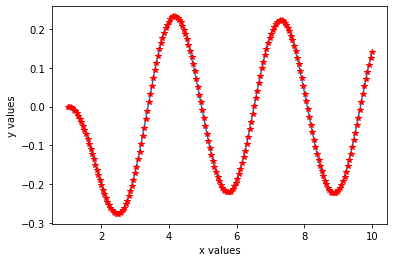

In [63]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np
def f(u,x):
    return (u[1],-2*u[1]-2*u[0]+np.cos(2*x))
y0 = [0,0]
xs = np.linspace(1,10,200)
us = odeint(f,y0,xs)
print(us)
ys = us[:,0]
plt.plot(xs,ys,'-')
plt.plot(xs,ys,'r*')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### Example 3 - 2nd order multiple coupled ODEs - https://stackoverflow.com/questions/54082884/how-are-2nd-order-odes-solved-in-python-with-two-variables-in-each-of-two-secon

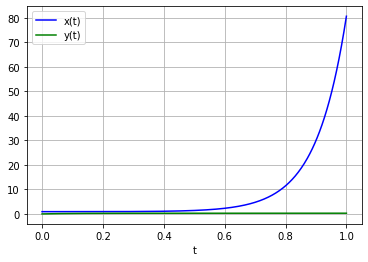

In [72]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def function(state, time, k):
    xt,yt,dxdt,dydt = state
    z               = np.sqrt((yt+k)**2+xt**2)
    ddxddt          = 10*dxdt + xt - ((k+1)*(xt    ))/z**3
    ddyddt          = -10*dydt + yt - ((k+1)*(yt + k))/z**3
    return dxdt, dydt, ddxddt, ddyddt


init = [
  0.921, #x[0]
  0,     #y[0]
  0,     #x'[0]
  3.0    #y'[0]
]

k = 1

times  = np.linspace(0,1,500)
sol = scipy.integrate.odeint(function, init, times, args=(k,), tfirst=False)


plt.plot(times, sol[:, 0], 'b', label='x(t)')
plt.plot(times, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


### Example 4 - Disc golf

/Users/mccanndahl/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


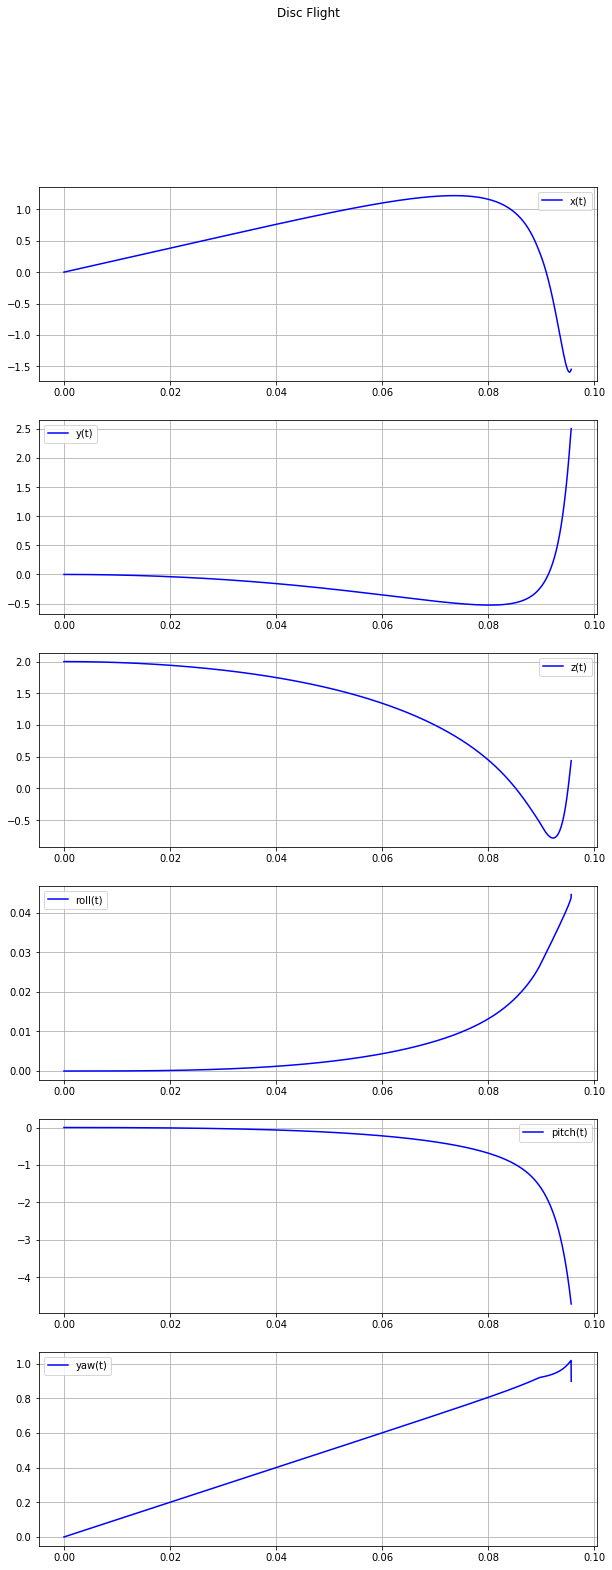

In [133]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from numpy.linalg import inv

m = 0.15 #kg mass of the disk
d = 0.137*2 #m Diameter of frizbee
pi = np.pi
#r = 5 # rad/sec how fast its spinning
S = pi*(d**2)/4 # the area of a circle/disk_wing_reference_area
g = np.array([[0],[0],[-9.81]])
c = d
k_zz = 0.86*c/2# radius of giration
I_z = m*k_zz**2
I_x = 0.5*I_z
I_y = 0.5*I_z
I = np.array([
    [I_x,0,0],
    [0,I_y,0],
    [0,0,I_z]
])
sin = np.sin
cos = np.cos
tan = np.tan
#sec = np.arccos # this isnt right

#TODO figure out these
C_L_p = 0.029
C_M_q = 0.012
C_N_r = 0.000074
rho_inf = 1.225 # density of air

def get_T_a(dummy):
    roll = dummy[0][0]
    pitch = dummy[1][0]
    yaw = dummy[2][0]
    return np.array([
        [cos(pitch)*cos(yaw),sin(roll)*sin(pitch)*cos(yaw)-cos(roll)*sin(yaw),cos(roll)*sin(pitch)*cos(yaw)+sin(roll)*sin(yaw)],
        [cos(pitch)*sin(yaw),sin(roll)*sin(pitch)*sin(yaw)+cos(roll)*cos(yaw),cos(roll)*sin(pitch)*sin(yaw)-sin(roll)*cos(yaw)],
        [-sin(pitch),sin(roll)*cos(pitch),cos(roll)*cos(pitch)]
    ])
def get_T_r(dummy):
    roll = dummy[0][0]
    pitch = dummy[1][0]
    yaw = dummy[2][0]
    return np.array([
        [1, sin(roll)*tan(pitch),cos(roll)*tan(pitch)],
        [0, cos(roll),-sin(roll)],
        [0,sin(roll)*(1/cos(pitch)),cos(roll)*(1/cos(pitch))]
    ])
def get_T_a_12(dummy):
    return get_T_a(dummy)
def get_T_a_23(beta_2):
    return get_T_a(np.array([[0],[0],[-beta_2]]))
def get_T_a_34(alpha_3):
    return get_T_a(np.array([[0],[-alpha_3],[0]]))
def get_T_r_12(dummy):
    return get_T_r(dummy)
def get_T_r_23(beta_2):
    return get_T_r(np.array([[0],[0],[-beta_2]]))
def get_T_r_34(alpha_3):
    return get_T_r(np.array([[0],[-alpha_3],[0]]))
    return v.magnitude()
def get_C_drag(alpha_3):
    return 0.085+3.3*(alpha_3+0.052)**2
def get_C_lift(alpha_3):
    return 0.13+3.09+alpha_3
def get_C_Yr(r,mag):
    # See p148
    AdvR = r*d/(2*mag)
    if mag < 6:
        if AdvR < 2:
            return 0
        if AdvR < 3:
            return .15
        else:
            return .6
    if mag < 10:
        if AdvR < 1:
            return 0
        if AdvR < 1.3:
            return .08
        else:
            return .25
    if mag < 15:
        if AdvR < 1:
            return 0
        else:
            return .18
    if AdvR < 0.5:
        return 0
    if AdvR < 1:
        return .05
    else:
        return .1
    return 0 #TODO
def get_C_M(alpha_3):
    return -0.01+0.057*alpha_3
def get_mag_of_vector(dummy):
    return np.linalg.norm(dummy)
def mult(one,two):
    #print("Multiplying")
    #print(one)
    #print(two)
    #result = one.dot(two.T) #matrix multiplication
    result = np.matmul(one,two)
    #print("Result")
    #print(result)
    return result

def function(state, time, k):
    #print('TIME = '+str(time))
    x,y,z,r,p,w,dxdt,dydt,dzdt,drdt,dpdt,dwdt = state
    
    p_1 = np.array([[x],[y],[z]])
    a_1 = np.array([[r],[p],[w]])
    pdot_1 = np.array([[dxdt],[dydt],[dzdt]])
    adot_1 = np.array([[drdt],[dpdt],[dwdt]])
    
    pdot_2 = mult(get_T_a_12(a_1),pdot_1)
    adot_2 = mult(get_T_r_12(a_1),adot_1)
    beta_2 = np.arctan2(pdot_2[1][0],pdot_2[0][0])
    #print('adot_2')
    #print(adot_2)
    #print('beta_2')
    #print(beta_2)
    
    pdot_3 = mult(get_T_a_23(beta_2),pdot_2)
    adot_3 = mult(get_T_r_23(beta_2),adot_2)
    alpha_3 = np.arctan2(pdot_3[2][0],pdot_3[0][0])
    #print('adot_3')
    #print(adot_3)
    #print('alpha_3')
    #print(alpha_3)
    
    pdot_4 = mult(get_T_a_34(alpha_3),pdot_3)
    adot_4 = mult(get_T_r_34(alpha_3),adot_3)
    #print("pdot_4")
    #print(pdot_4)
    #print("adot_4")
    #print(adot_4)
    #print("get_mag_of_vector(pdot_4)")
    #print(get_mag_of_vector(pdot_4))
    
    p_2 = adot_2[0][0]
    q_2 = adot_2[1][0]
    r_2 = adot_2[2][0]
    p_4 = adot_4[0][0]
    q_4 = adot_4[1][0]
    r_4 = adot_4[2][0]
    r_3 = adot_3[2][0]
    #print('r2')
    #print(r_2)
    
    C_drag = get_C_drag(alpha_3)
    C_lift = get_C_lift(alpha_3)
    C_slide = get_C_Yr(r_3,get_mag_of_vector(pdot_4))
    C_L = C_L_p*(p_4*c/(2*get_mag_of_vector(pdot_4)))
    C_M = get_C_M(alpha_3)+C_M_q*(q_4*c/(2*get_mag_of_vector(pdot_4)))
    C_N = C_N_r*(r_4*c/(2*get_mag_of_vector(pdot_4)))
    #print('C_L')
    #print(C_L)
    
    C_F = np.array([[-C_drag], [C_slide], [-C_lift]])
    C_mom = np.array([[C_L],[C_M],[C_N]])
    #print('C_mom')
    #print(C_mom)
    q_inf = 0.5*rho_inf*get_mag_of_vector(pdot_1)**2
    
    M_4 = q_inf*S*c*C_mom
    F_4 = q_inf*S*C_F
    #print('M_4')
    #print(M_4)

    F_2_aero = mult(mult(get_T_a_23(beta_2).transpose(),get_T_a_34(alpha_3).transpose()),F_4)
    M_2 = mult(mult(get_T_r_23(beta_2).transpose(),get_T_r_34(alpha_3).transpose()),M_4)
    #print('M_2')
    #print(M_2)

    F_2 = F_2_aero + mult(get_T_a_12(a_1)*m,g)

    w_sqwig = np.array([
        [0,-r_2,q_2],
        [r_2,0,-p_2],
        [-q_2,p_2,0]
    ])

    pdotdot_2 = F_2/m-mult(w_sqwig,pdot_2)
    adotdot_2 = mult(inv(I),M_2)-mult(w_sqwig,adot_2)
    #print('adotdot_2')
    #print(adotdot_2)


    pdotdot_1 = mult(get_T_a_12(a_1).transpose(),pdotdot_2)
    adotdot_1 = mult(get_T_r_12(a_1).transpose(),adotdot_2)
    #print('pdotdot_1')
    #print(pdotdot_1)
    #print('adotdot_1')
    #print(adotdot_1)

    ddxddt = pdotdot_1[0][0]
    ddyddt = pdotdot_1[1][0]
    ddzddt = pdotdot_1[2][0]
    ddrddt = adotdot_1[0][0]
    ddpddt = adotdot_1[1][0]
    ddwddt = adotdot_1[2][0]

    return dxdt,dydt,dzdt,drdt,dpdt,dwdt,ddxddt,ddyddt,ddzddt,ddrddt,ddpddt,ddwddt


init = [
  0,     #x[0]
  0,     #y[0]
  2,     #z[0]
  0,     #r[0]
  0,     #p[0]
  0,     #w[0]
  19,     #x'[0]
  0,     #y'[0]
  0,     #z'[0]
  0,   #r'[0]
  0,     #p'[0]
  10,     #w'[0]
]

k = 1

times  = np.linspace(0,0.1,10000)
values = scipy.integrate.odeint(function, init, times, args=(k,), tfirst=False)

#print(times)

fig, axs = plt.subplots(6,figsize=(10,25))
fig.suptitle('Disc Flight')
axs[0].plot(times, values[:, 0], 'b', label='x(t)')
axs[1].plot(times, values[:, 1], 'b', label='y(t)')
axs[2].plot(times, values[:, 2], 'b', label='z(t)')
axs[3].plot(times, values[:, 3], 'b', label='roll(t)')
axs[4].plot(times, values[:, 4], 'b', label='pitch(t)')
axs[5].plot(times, values[:, 5], 'b', label='yaw(t)')

for i in range(6):
    axs[i].legend(loc='best')
    axs[i].grid()



